### Crossvalidation – po co, dlaczego działa?

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()

X, y, iris_classes = iris.data, iris.target, iris.target_names

In [2]:
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

models = []
scores = []

for fold_nr, (train_idx, test_idx) in enumerate(kf.split(X)):
  X_train = X[train_idx]
  X_test =X[test_idx]

  y_train = y[train_idx]
  y_test = y[test_idx]

  # skalowanie danych wejściowych, aby model lepiej działał
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  clf = SGDClassifier(random_state=1).fit(X_train, y_train)

  models.append(clf)
  scores.append(clf.score(X_test, y_test))


print("wyniki poszczególnych foldów: ", scores)
print("średni wynik wszystkich foldów: ", np.array(scores).mean())

wyniki poszczególnych foldów:  [0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333]
średni wynik wszystkich foldów:  0.9199999999999999


### Wrapper

In [3]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# stworzenie klasyfikatora
clf = SGDClassifier(random_state=1)

# użycie metody cross_val_score do sprawdzenia
# działania naszego modelu na różnych podziałach
cv_score = cross_val_score(clf, X, y, cv=5)
print("wynik kroswalidacji: ", cv_score)
print("średni wynik wszystkich foldów: ", cv_score.mean())

wynik kroswalidacji:  [0.83333333 0.93333333 0.8        0.7        0.9       ]
średni wynik wszystkich foldów:  0.8333333333333334


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.99, 0.01],
    flip_y=0,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                    random_state=3)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=790, 1=10, Test: 0=200, 1=0


In [5]:
#Przykład podziału za pomocą stratyfikacji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                    random_state=3, stratify=y)
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


In [6]:
# wcześniejszy przykład z użyciem stratifiedKFold
from sklearn.model_selection import StratifiedKFold

# stworzenie KFold obiektu z 5 foldami i tasowaniem danych
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

models = []
scores = []

# iteracja przez poszczególne foldy
# dodatkowy parametr y w metodzie split
for fold_nr, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train = X[train_idx]
    X_test =X[test_idx]

    y_train = y[train_idx]
    y_test = y[test_idx]

    # skalowanie danych wejściowych, aby model lepiej działał
    # skalowanie danych wewnątrz poszczeŋólnych iteracji
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # stworzenie klasyfikatora dla poszczególnej iteracji
    # wytrenowanie klasyfikatora na danych treningowych
    clf = SGDClassifier(random_state=1).fit(X_train, y_train)
    
    # dodawanie klasyfikatora do tablicy klasyfikatorów
    models.append(clf)
    # dodawanie wyniku dla danych testowych do tablicy
    scores.append(clf.score(X_test, y_test))

In [7]:
print("wyniki poszczególnych foldów: ", scores)
print("średni wynik wszystkich foldów: ", np.array(scores).mean())

wyniki poszczególnych foldów:  [0.995, 0.985, 0.975, 0.965, 0.99]
średni wynik wszystkich foldów:  0.982


### Clustering

### Definicja

In [8]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

data = load_wine()
X = data.data
y = data.target

In [9]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

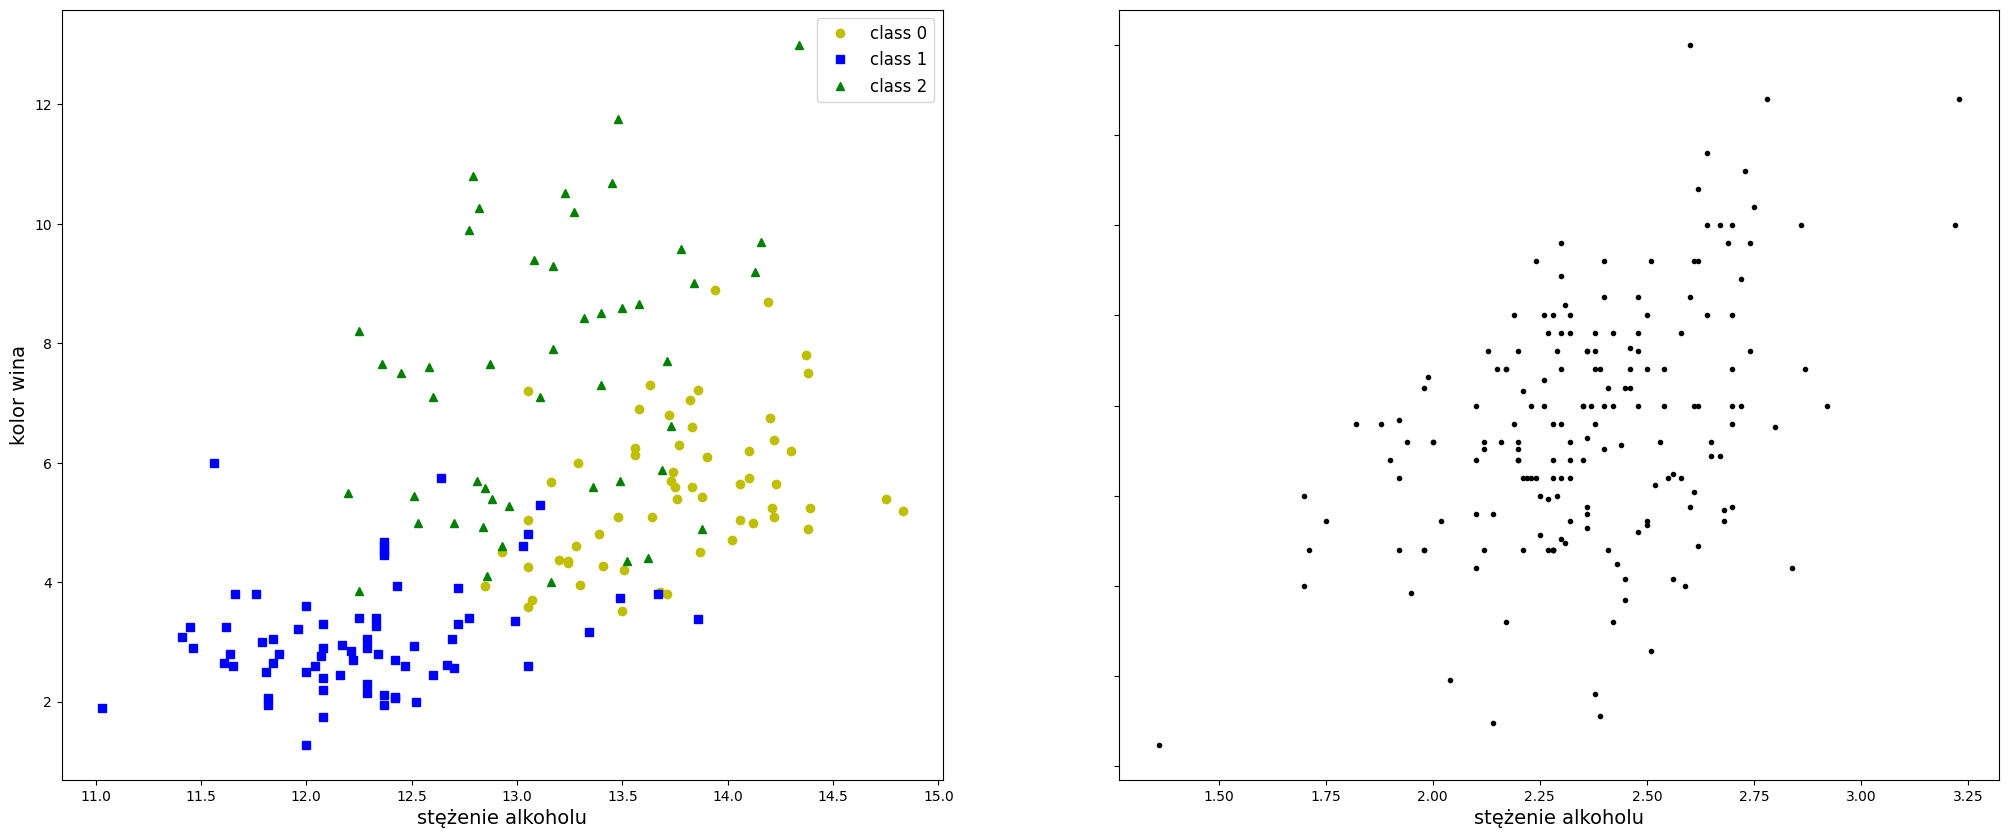

In [11]:
# przykład podziału dancyh w przypadku Supervised Learning oraz Clusteringu

plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 9], "yo", label="class 0")
plt.plot(X[y==1, 0], X[y==1, 9], "bs", label="class 1")
plt.plot(X[y==2, 0], X[y==2, 9], "g^", label="class 2")
plt.xlabel("stężenie alkoholu", fontsize=14)
plt.ylabel("kolor wina", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("stężenie alkoholu", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

### Podstawowe metody (KMeans)

In [12]:
import numpy as np

from sklearn.datasets import make_blobs

# środki naszych klastrów

centroids = np.array(
    [[ 0.8,  2.0],
     [-0.5 ,  2.0],
     [-2.0,  2.0],
     [-2.5,  2.5],
     [-2.5,  1.0]])

# wprowadzenie szumu do naszych klastrów, aby rozrzucić próbki
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# stworzenie zbioru danych
X, y = make_blobs(n_samples=3000, centers=centroids,
                  cluster_std=blob_std, random_state=7)

In [13]:
def plot_clusters(X, y=None):
    plt.figure(figsize=(15, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$x_2$", fontsize=15, rotation=0)
    plt.grid()

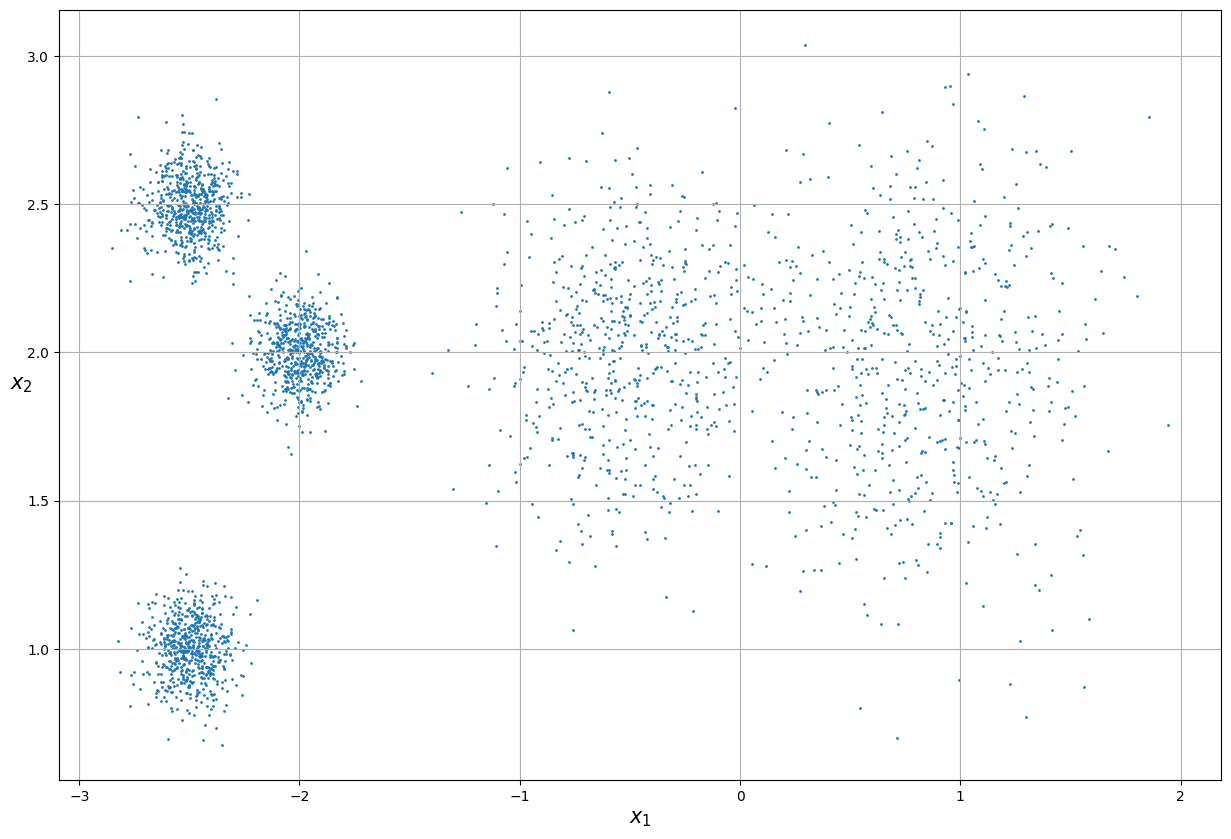

In [14]:
plot_clusters(X)

In [15]:
# import odpowiedniej biblioteki
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5)

# możemy uzyć metod fit(), predict() 
clf.fit(X)
y_pred = clf.predict(X)

#albo metody fit/predict, która łączy dwie powyższe

y_pred = clf.fit_predict(X)
print(y_pred)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 3 ... 1 3 4]


In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

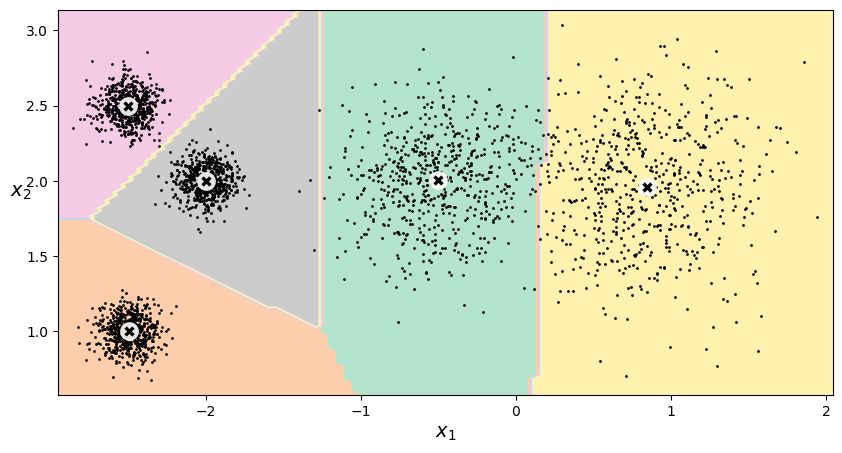

In [17]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [18]:
clf.cluster_centers_

array([[-0.50272248,  2.00353577],
       [-2.4969983 ,  0.99834723],
       [-2.50172193,  2.49446936],
       [ 0.84611988,  1.95575377],
       [-1.99702059,  1.99984058]])

### Zasada działania KMeans

In [19]:
# poszczególne kroki 

clf_1 = KMeans(n_clusters=5, max_iter=1, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_2 = KMeans(n_clusters=5, max_iter=2, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_3 = KMeans(n_clusters=5, max_iter=3, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_300 = KMeans(n_clusters=5, max_iter=300, init="random", n_init=1, algorithm="lloyd", random_state=42)
clf_1.fit(X)
clf_2.fit(X)
clf_3.fit(X)
clf_300.fit(X)

KMeans(init='random', n_clusters=5, n_init=1, random_state=42)

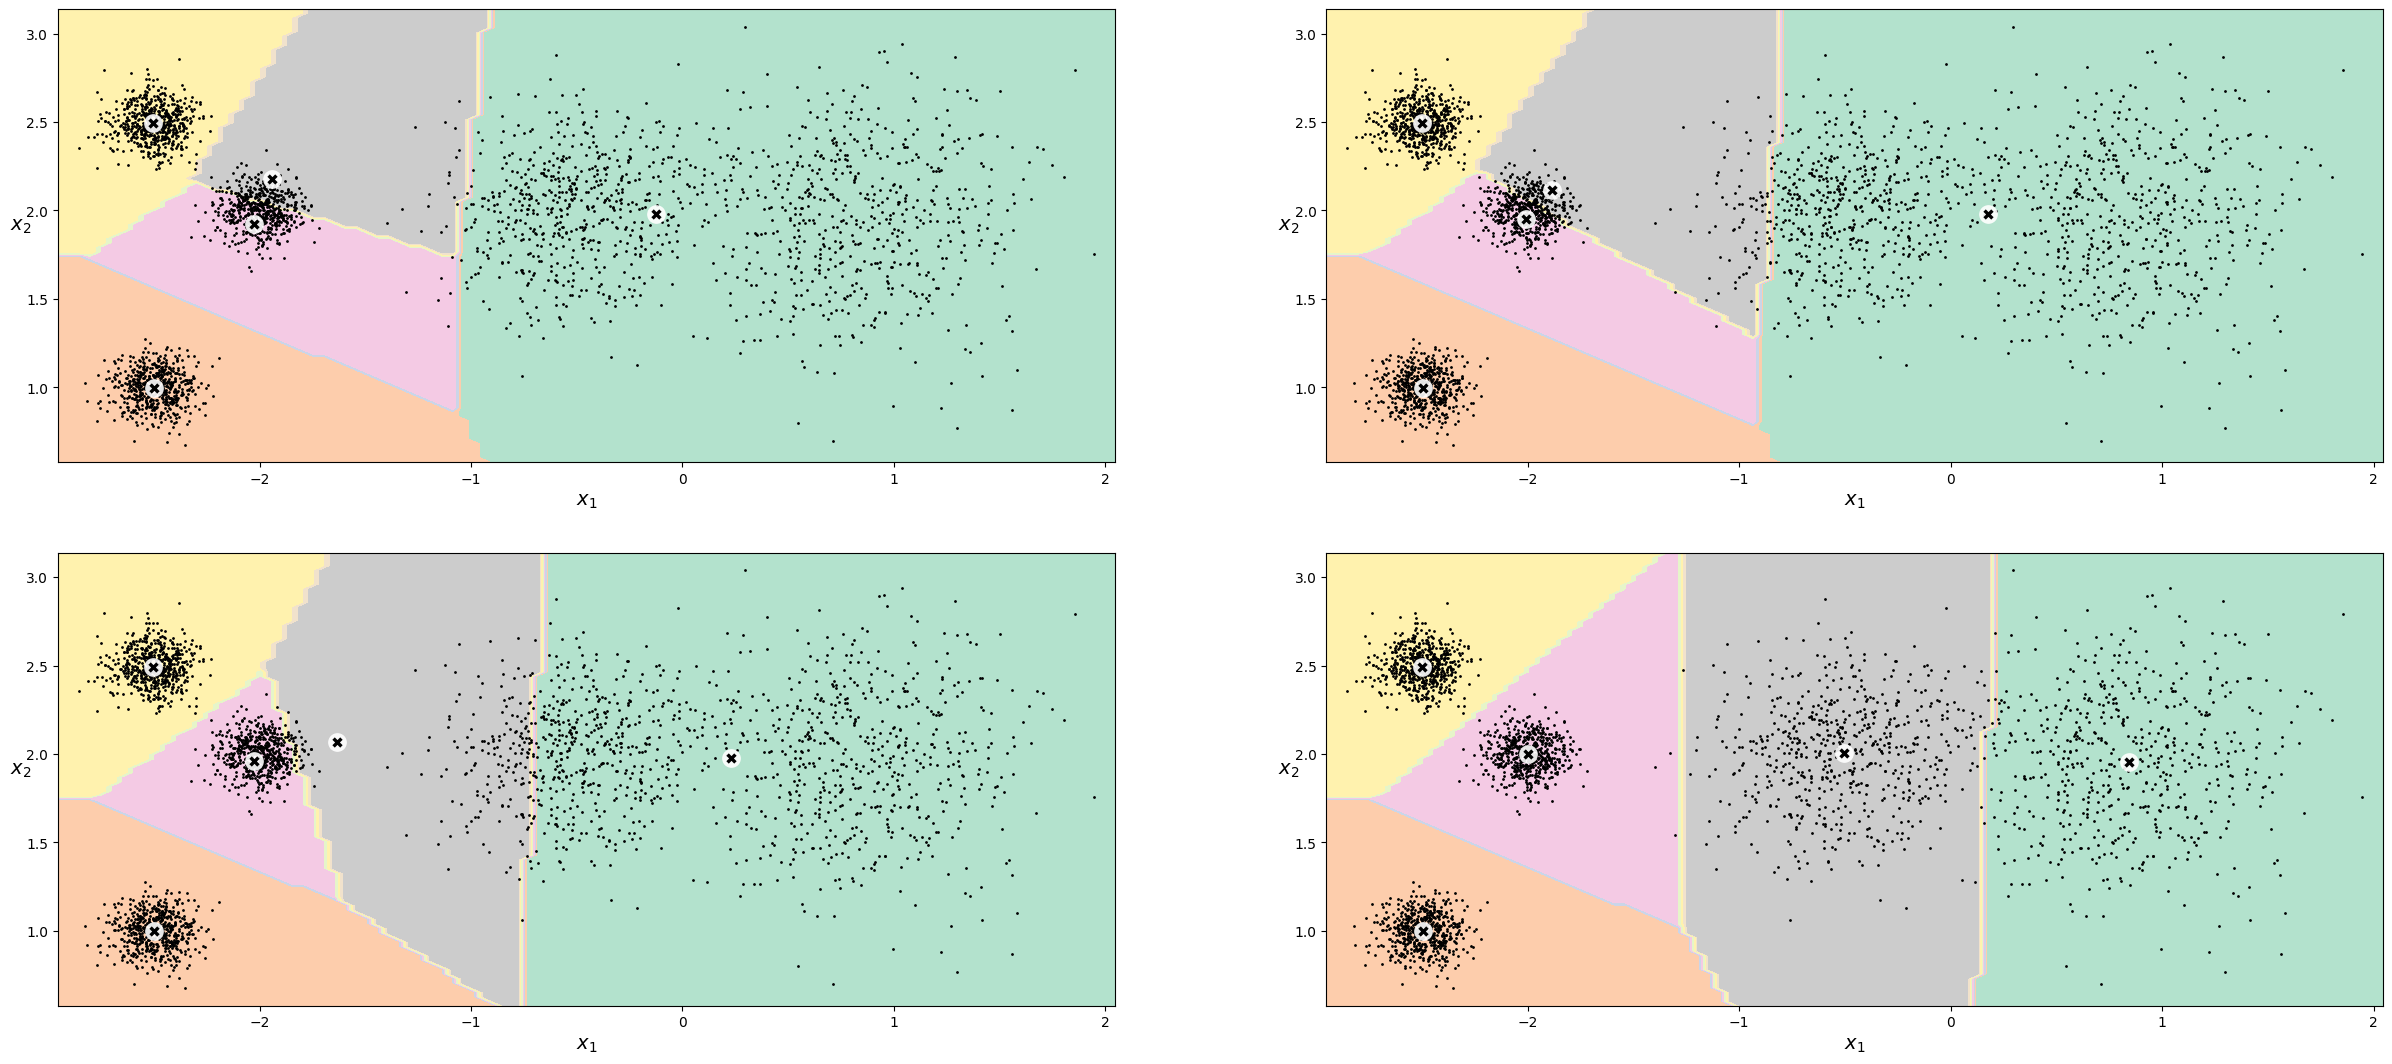

In [20]:
# narysujmy teraz poszczególne kroki jeden pod drugim

plt.figure(figsize=(30, 20))

plt.subplot(321)
plot_decision_boundaries(clf_1, X)

plt.subplot(322)
plot_decision_boundaries(clf_2, X)

plt.subplot(323)
plot_decision_boundaries(clf_3, X)

plt.subplot(324)
plot_decision_boundaries(clf_300, X)
plt.show()

### Szybsze wersje KMeans

In [21]:
# KMeans vs MiniBatchKMeans

# import odpowiedniej biblioteki
from sklearn.cluster import KMeans, MiniBatchKMeans

# K-means CLustering

from sklearn.datasets import make_blobs
import numpy as np

centroids = np.array(
    [[ 0.8,  20.0],
     [-0.5 ,  20.0],
     [-20.0,  20.0],
     [-20.5,  20.5],
     [-20.5,  10.0]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=3000000, centers=centroids,
                  cluster_std=blob_std, random_state=7)

In [22]:
from sklearn.cluster import MiniBatchKMeans

%timeit

# metoda MiniBatchKMeans
MBKMeans_clf = MiniBatchKMeans(n_clusters=5, max_iter=10, random_state=1)
%timeit MBKMeans_clf.fit(X)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `

191 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.cluster import KMeans

%timeit

# metoda KMeans
KMeans_clf = KMeans(n_clusters=5, max_iter=10, random_state=1)
%timeit KMeans_clf.fit(X)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

7.41 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Jak dobrać ilość klastrów?

In [24]:
# dobieranie najlepszej wartości K

centroids = np.array(
    [[ 0.8,  2.0],
     [-0.5 ,  2.0],
     [-2.0,  2.0],
     [-2.5,  2.5],
     [-2.5,  1.0]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=3000, centers=centroids,
                  cluster_std=blob_std, random_state=7)
                  
#1 Tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 20) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra
]

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

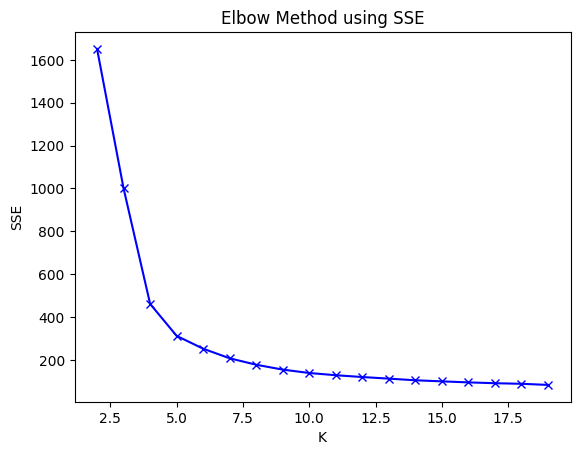

In [25]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [26]:
#2. Używamy tzw silhouette_score

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

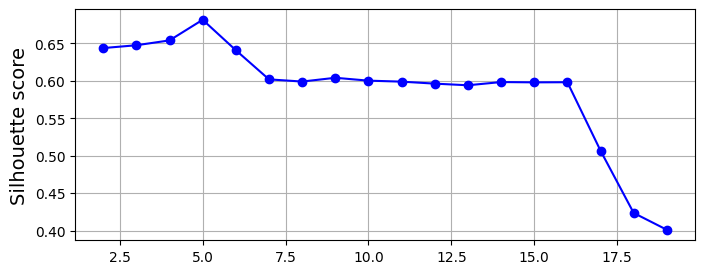

In [27]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

### Praktyczne użycie KMeans

### Ćwiczenie

In [28]:
# Ćwiczenie KMeans jako preprocessing danych
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Wczytaj dataset digits
X_digits, y_digits = load_digits(return_X_y=True)

# Podziel go na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=2)

# Użyj prostego klasyfikatora LogisticRegression, aby przewidzieć jaką cyfrę przedstawia 
# obrazek i wypisz uzyskany wynik (użyj multi_class="ovr")
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)
print("Bez KMeans :", log_reg.score(X_test, y_test))

# Utwórz pipeline składający się z: 
# - KMeansClustering z ilością klastrów znacznie większą od ilości klas w zbiorze 
# (w praktyce o wiele lepiej działa stworzenie większej ilości klastrów niż chcemy 
# przewidzieć klas) 
# - oraz LogisticRegression
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40, random_state=2)),
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)),
])

# Naucz taki pipeline i wypisz wynik
pipeline.fit(X_train, y_train)
print("Z KMeans :", pipeline.score(X_test, y_test))

Bez KMeans : 0.9466666666666667


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Z KMeans : 0.9577777777777777


In [29]:
# Widać, że użycie preprocessingu w postaci KMeans powoduje poprawienie wyniku.

### DBSCAN

In [30]:
#DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# tworzymy zbiór moon
X, y = make_moons(n_samples=1000, noise=0.08)

# tworzymy pierwszy klasyfikator DBSCAN z eps = 0.05
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# drugi DBSCAN z eps = 0.2 (większy epsilon, większa przestrzeń wokół)
dbscan_2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_2.fit(X)

DBSCAN(eps=0.2)

In [31]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], 
                marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), 
                fontsize=14)

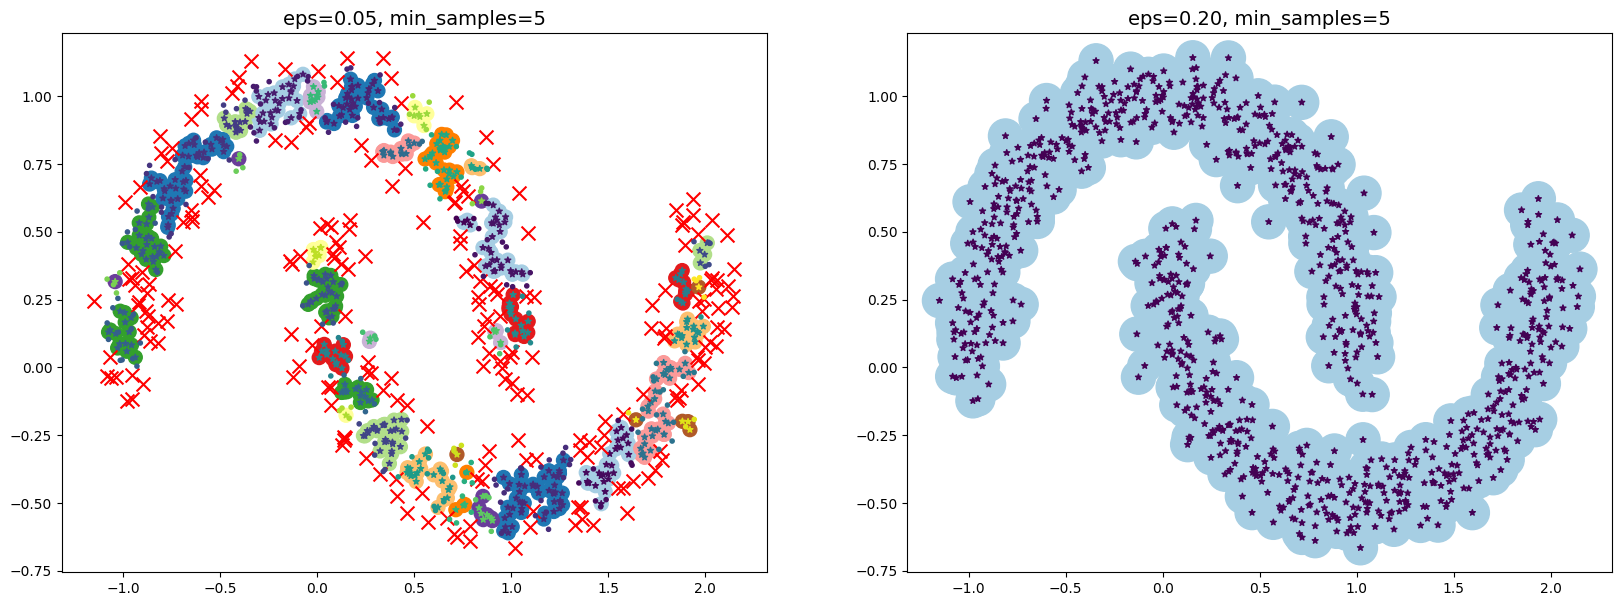

In [32]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, X, size=600)

plt.show()


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


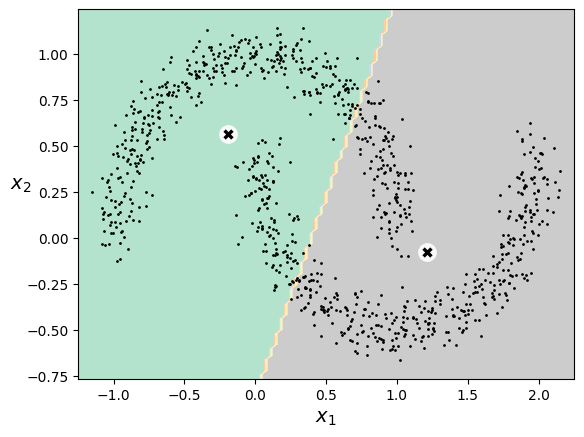

In [33]:
KMeans_clf = KMeans(n_clusters=2, max_iter=100000)
KMeans_clf.fit(X)

plot_decision_boundaries(KMeans_clf, X)

### Gaussian Mixture Models (GNN)

In [34]:
from sklearn.datasets import make_blobs
import numpy as np

# tworzymy "bloby", czyli grupy danych
X1, y1 = make_blobs(n_samples=800, centers=((2, -2), (-2, 2)), random_state=2)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=200, centers=1, random_state=42)
X2 = X2 + [6, -8]

# przydatna metoda NumPy r_ - służy do składania dwóch tablic wg wybranej osi
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [35]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [36]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

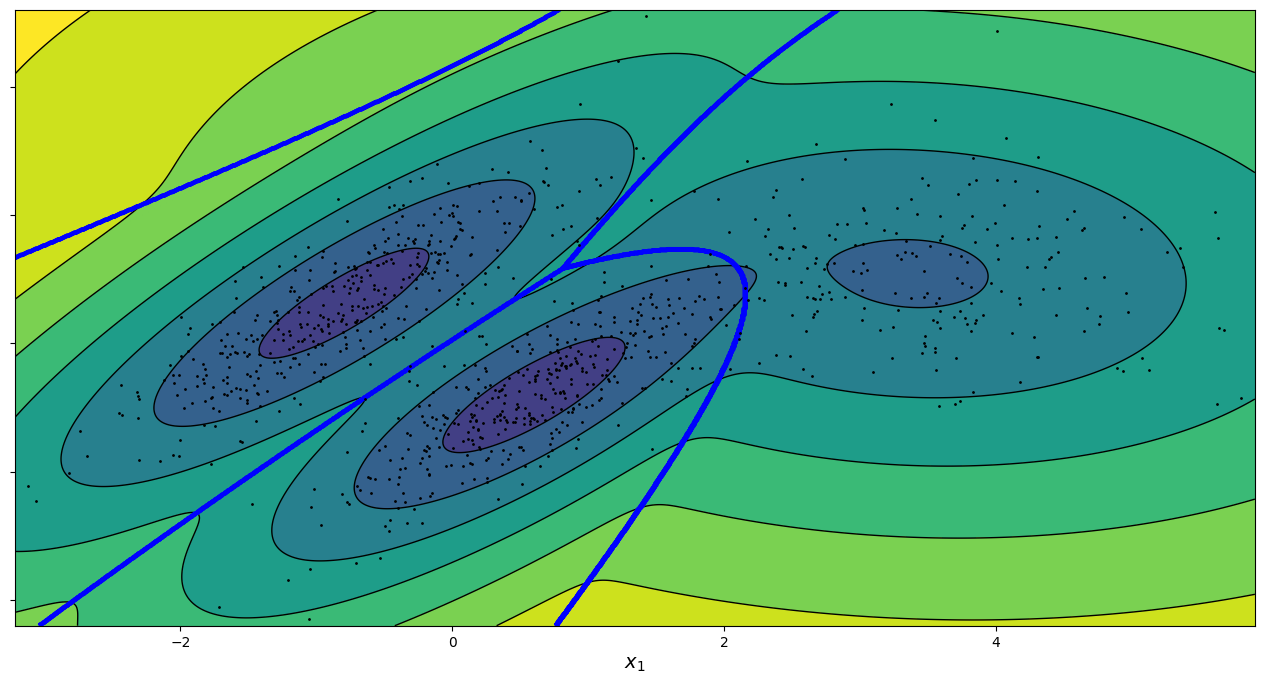

In [37]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

In [38]:
gm.converged_

True

In [39]:
gm.n_iter_

10

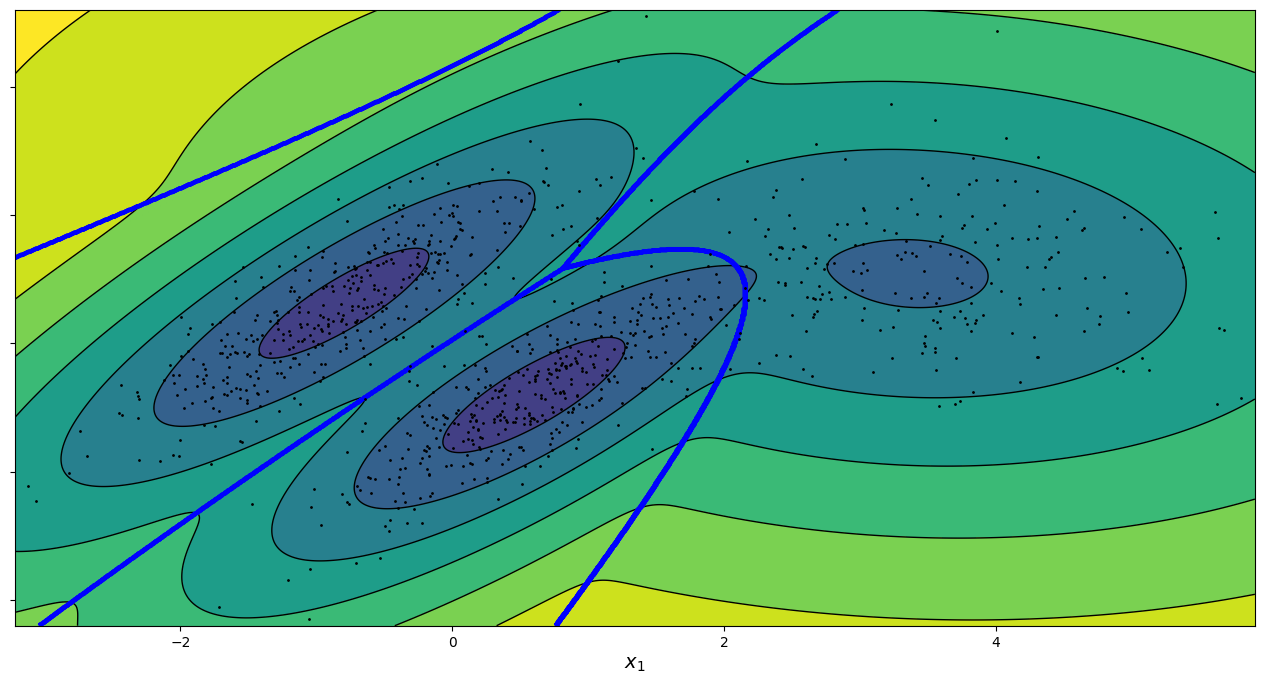

In [40]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="full")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

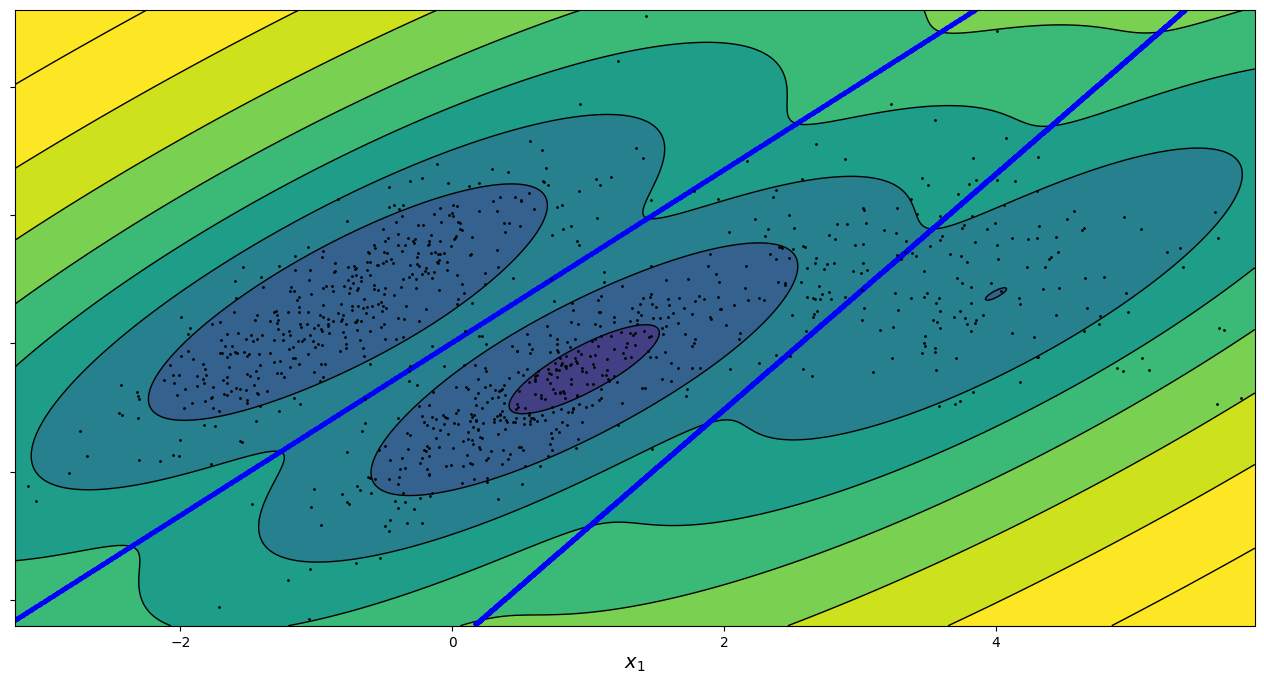

In [41]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="tied")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

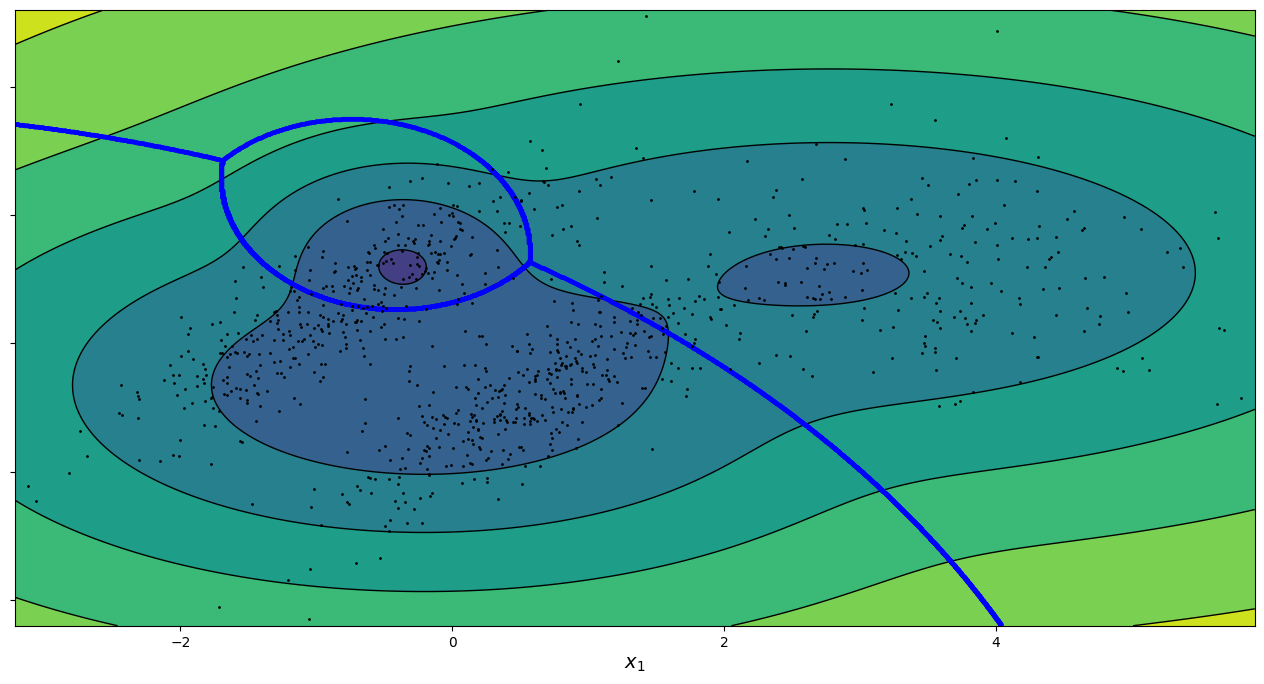

In [42]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="diag")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

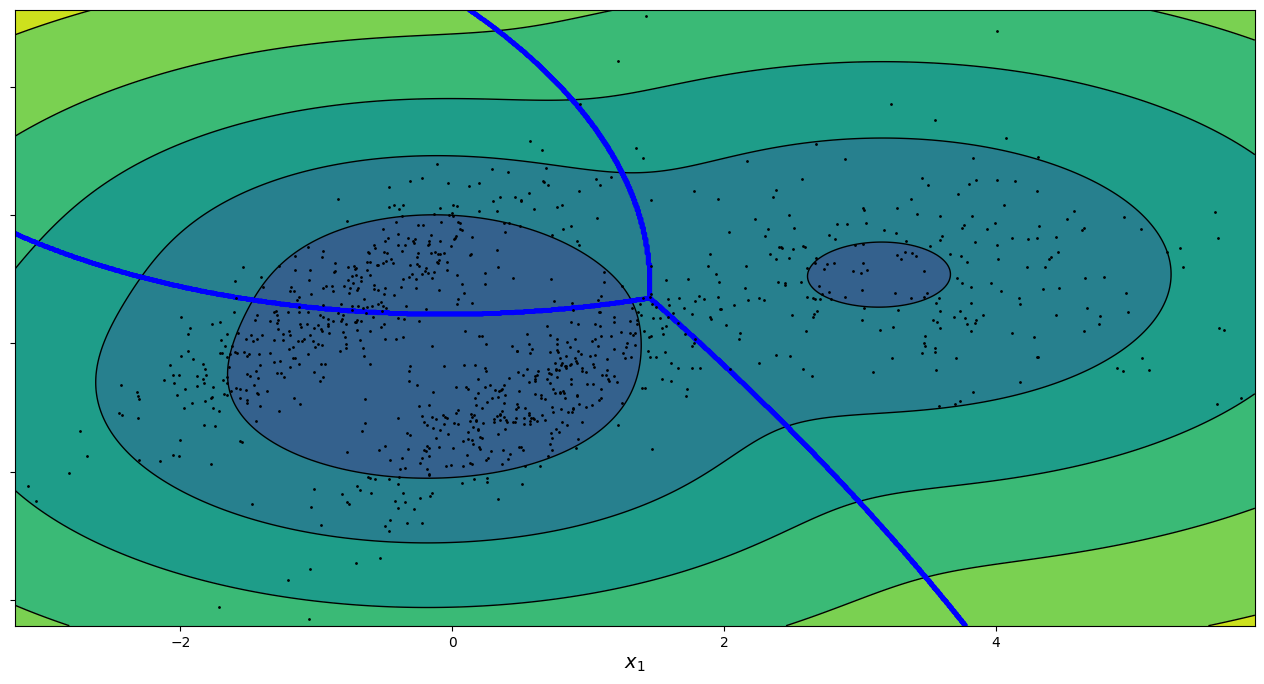

In [43]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type="spherical")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

### GMM jako wykrywacz anomalii

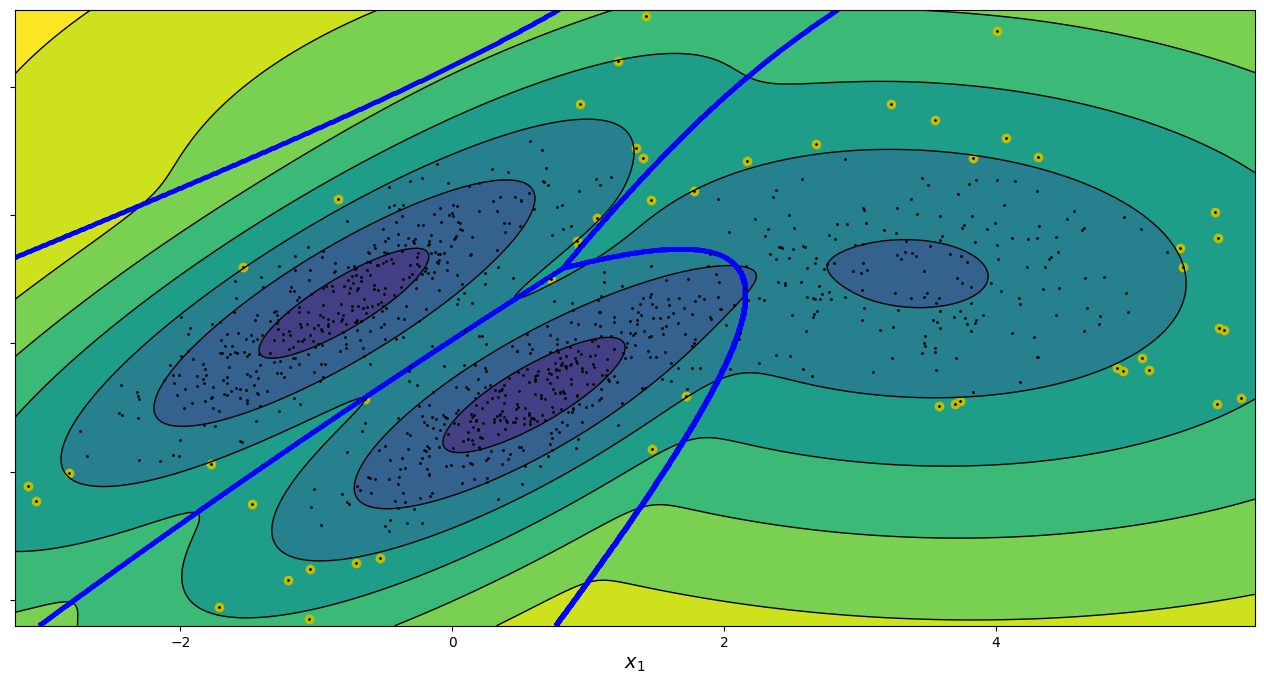

In [44]:
# rysujemy wykres jak poprzednio
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)

# odsiewanie anomalii
# Pobieramy wartości dla naszego zbioru, które
# mówią nam, jak bardzo element należy do klastrów
density = gm.score_samples(X)

# Tworzymy wartość graniczną, czyli threshold. 
# Wartości, które mają wyniki z poprzedniej linii mniejsze od naszego threshold, 
# są anomaliami, więc zostają odsiane
# W naszym przypadku chcemy odsiać 5% najgorszych wartości
threshold = np.percentile(density, 5)

# Odsiewamy te wartości poprzez proste porównanie
anomalie = X[density < threshold]

plt.scatter(anomalie[:, 0], anomalie[:, 1], color='y', marker='o')
plt.show()